In [1]:
!pip install upsetplot

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [121]:
from ast import literal_eval
import os
import pandas as pd
from glob import glob
import numpy as np
from sklearn.metrics import classification_report
import torchvision
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
import matplotlib.pyplot as plt
from upsetplot import plot 
from matplotlib import pyplot
%matplotlib inline

In [122]:
res_df = pd.read_csv("./resnet_basic_32_ra_2_20/results.csv")
res_df.drop('Unnamed: 0', 1, inplace = True)
res_df.drop('Unnamed: 0.1', 1, inplace = True)
res_df

,Model,Epoch,Testset,Loss,Accuracy,Original_Accuracy,Original_CI
0,resnet_basic_32_ra_2_20,200,cifar10,1.4212,0.7254,92.5,"(92.0, 93.0)"
1,resnet_basic_32_ra_2_20,100,cifar10,1.6066,0.7281,92.5,"(92.0, 93.0)"
2,resnet_basic_32_ra_2_20,200,cifar10.1,2.5458,0.5505,84.9,"(83.2, 86.4)"
3,resnet_basic_32_ra_2_20,100,cifar10.1,1.9095,0.5490,84.9,"(83.2, 86.4)"
4,resnet_basic_32_ra_2_20_refined200,250,cifar10,0.4312,0.8691,92.5,"(92.0, 93.0)"
5,resnet_basic_32_ra_2_20_refined100,350,cifar10,0.3978,0.8700,92.5,"(92.0, 93.0)"
6,resnet_basic_32_ra_2_20_refined200,250,cifar10.1,0.7625,0.7630,84.9,"(83.2, 86.4)"
7,resnet_basic_32_ra_2_20_refined100,350,cifar10.1,0.7138,0.7700,84.9,"(83.2, 86.4)"
8,resnet_basic_32_ra_2_20,400,cifar10,1.7503,0.7241,92.5,"(92.0, 93.0)"
9,resnet_basic_32_ra_2_20,300,cifar10,1.6118,0.7259,92.5,"(92.0, 93.0)"


In [123]:
# copy commands from previous
df_orig = res_df

df_orig['Accuracy'] = df_orig['Accuracy'].apply(lambda x: x*100)
df_orig['Original_CI'] = df_orig.Original_CI.apply(lambda x: literal_eval(x))
df_orig['Orig_CI_Low'], df_orig['Orig_CI_Hi'] = zip(*df_orig.Original_CI)

# Filter data into subsets based on test dataset used
df_orig_cifar10 = df_orig[df_orig['Testset'] == 'cifar10'].reset_index()
df_orig_cifar101 = df_orig[df_orig['Testset'] == 'cifar10.1'].reset_index()

In [124]:
df_orig_cifar10

,index,Model,Epoch,Testset,Loss,Accuracy,Original_Accuracy,Original_CI,Orig_CI_Low,Orig_CI_Hi
0,0,resnet_basic_32_ra_2_20,200,cifar10,1.4212,72.54,92.5,"(92.0, 93.0)",92.0,93.0
1,1,resnet_basic_32_ra_2_20,100,cifar10,1.6066,72.81,92.5,"(92.0, 93.0)",92.0,93.0
2,4,resnet_basic_32_ra_2_20_refined200,250,cifar10,0.4312,86.91,92.5,"(92.0, 93.0)",92.0,93.0
3,5,resnet_basic_32_ra_2_20_refined100,350,cifar10,0.3978,87.00,92.5,"(92.0, 93.0)",92.0,93.0
4,8,resnet_basic_32_ra_2_20,400,cifar10,1.7503,72.41,92.5,"(92.0, 93.0)",92.0,93.0
5,9,resnet_basic_32_ra_2_20,300,cifar10,1.6118,72.59,92.5,"(92.0, 93.0)",92.0,93.0
6,12,resnet_basic_32_ra_2_20_refined400,50,cifar10,0.4279,86.70,92.5,"(92.0, 93.0)",92.0,93.0
7,13,resnet_basic_32_ra_2_20_refined300,150,cifar10,0.4342,87.40,92.5,"(92.0, 93.0)",92.0,93.0


In [125]:
df_orig_cifar101

,index,Model,Epoch,Testset,Loss,Accuracy,Original_Accuracy,Original_CI,Orig_CI_Low,Orig_CI_Hi
0,2,resnet_basic_32_ra_2_20,200,cifar10.1,2.5458,55.05,84.9,"(83.2, 86.4)",83.2,86.4
1,3,resnet_basic_32_ra_2_20,100,cifar10.1,1.9095,54.90,84.9,"(83.2, 86.4)",83.2,86.4
2,6,resnet_basic_32_ra_2_20_refined200,250,cifar10.1,0.7625,76.30,84.9,"(83.2, 86.4)",83.2,86.4
3,7,resnet_basic_32_ra_2_20_refined100,350,cifar10.1,0.7138,77.00,84.9,"(83.2, 86.4)",83.2,86.4
4,10,resnet_basic_32_ra_2_20,400,cifar10.1,3.1568,53.75,84.9,"(83.2, 86.4)",83.2,86.4
5,11,resnet_basic_32_ra_2_20,300,cifar10.1,3.0470,52.65,84.9,"(83.2, 86.4)",83.2,86.4
6,14,resnet_basic_32_ra_2_20_refined400,50,cifar10.1,0.8061,76.45,84.9,"(83.2, 86.4)",83.2,86.4
7,15,resnet_basic_32_ra_2_20_refined300,150,cifar10.1,0.7919,76.35,84.9,"(83.2, 86.4)",83.2,86.4


In [126]:
# # distribution gap for random augment iterations only
# df_ra_only = df_dist_gap[df_dist_gap['Model'] == 'resnet_basic_32_ra_2_20']
# plt.bar(x=df_ra_only.Epoch, height=df_ra_only.Accuracy, width = 10)

In [127]:
# distribution gap for augmented 

In [128]:
df_orig

,Model,Epoch,Testset,Loss,Accuracy,Original_Accuracy,Original_CI,Orig_CI_Low,Orig_CI_Hi
0,resnet_basic_32_ra_2_20,200,cifar10,1.4212,72.54,92.5,"(92.0, 93.0)",92.0,93.0
1,resnet_basic_32_ra_2_20,100,cifar10,1.6066,72.81,92.5,"(92.0, 93.0)",92.0,93.0
2,resnet_basic_32_ra_2_20,200,cifar10.1,2.5458,55.05,84.9,"(83.2, 86.4)",83.2,86.4
3,resnet_basic_32_ra_2_20,100,cifar10.1,1.9095,54.90,84.9,"(83.2, 86.4)",83.2,86.4
4,resnet_basic_32_ra_2_20_refined200,250,cifar10,0.4312,86.91,92.5,"(92.0, 93.0)",92.0,93.0
5,resnet_basic_32_ra_2_20_refined100,350,cifar10,0.3978,87.00,92.5,"(92.0, 93.0)",92.0,93.0
6,resnet_basic_32_ra_2_20_refined200,250,cifar10.1,0.7625,76.30,84.9,"(83.2, 86.4)",83.2,86.4
7,resnet_basic_32_ra_2_20_refined100,350,cifar10.1,0.7138,77.00,84.9,"(83.2, 86.4)",83.2,86.4
8,resnet_basic_32_ra_2_20,400,cifar10,1.7503,72.41,92.5,"(92.0, 93.0)",92.0,93.0
9,resnet_basic_32_ra_2_20,300,cifar10,1.6118,72.59,92.5,"(92.0, 93.0)",92.0,93.0


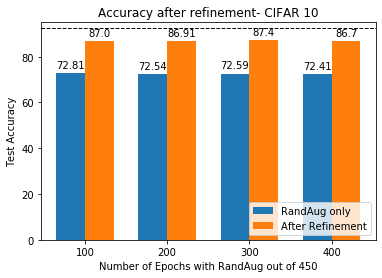

In [129]:
# sort by epoch for randaugment
df_orig_cifar10.sort_values(by='Epoch', inplace = True)

ep_ra = df_orig_cifar10[df_orig_cifar10['Model'] == "resnet_basic_32_ra_2_20"]['Epoch']
ac_ra = df_orig_cifar10[df_orig_cifar10['Model'] == "resnet_basic_32_ra_2_20"]['Accuracy']

# reverse the sort to have aligning 
df_orig_cifar10.sort_values(by='Epoch', ascending = False, inplace = True)
ep_re = 450 - df_orig_cifar10[df_orig_cifar10['Model'] != "resnet_basic_32_ra_2_20"]['Epoch']
ac_re = df_orig_cifar10[df_orig_cifar10['Model'] != "resnet_basic_32_ra_2_20"]['Accuracy']

x = np.arange(4)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, ac_ra, width, label = "RandAug only")
rects2 = ax.bar(x+width/2, ac_re, width, label = "After Refinement")

ax.set_ylabel("Test Accuracy")
ax.set_ylim([0,95])
ax.set_title("Accuracy after refinement- CIFAR 10")
ax.set_xticks(x)
ax.set_xticklabels(['100', '200', '300', '400'])
ax.set_xlabel('Number of Epochs with RandAug out of 450')
ax.axhline(y=(92.32), linewidth = 1, linestyle = '--', color = 'k')
ax.legend(loc = 'lower right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)



plt.show()

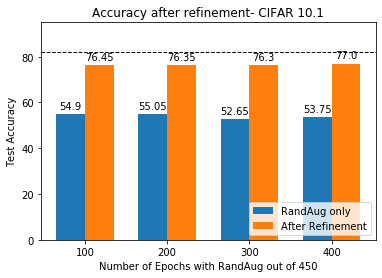

In [130]:
# sort by epoch for randaugment
df_orig_cifar101.sort_values(by='Epoch', inplace = True)

ep_ra = df_orig_cifar101[df_orig_cifar101['Model'] == "resnet_basic_32_ra_2_20"]['Epoch']
ac_ra = df_orig_cifar101[df_orig_cifar101['Model'] == "resnet_basic_32_ra_2_20"]['Accuracy'].round(decimals = 2)

# reverse the sort to have aligning 
df_orig_cifar10.sort_values(by='Epoch', ascending = False, inplace = True)
ep_re = 450 - df_orig_cifar101[df_orig_cifar101['Model'] != "resnet_basic_32_ra_2_20"]['Epoch']
ac_re = df_orig_cifar101[df_orig_cifar101['Model'] != "resnet_basic_32_ra_2_20"]['Accuracy'].round(decimals = 2)

x = np.arange(4)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, ac_ra, width, label = "RandAug only")
rects2 = ax.bar(x+width/2, ac_re, width, label = "After Refinement")

ax.set_ylabel("Test Accuracy")
ax.set_ylim([0,95])
ax.set_title("Accuracy after refinement- CIFAR 10.1")
ax.set_xticks(x)
ax.set_xticklabels(['100', '200', '300', '400'])
ax.set_xlabel('Number of Epochs with RandAug out of 450')
ax.axhline(y=(82.2), linewidth = 1, linestyle = '--', color = 'k')
ax.legend(loc = 'lower right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)



plt.show()


In [131]:
dist_loss = df_orig_cifar10['Loss'] - df_orig_cifar101['Loss']
dist_acc = df_orig_cifar10['Accuracy'] - df_orig_cifar101['Accuracy']
df_dist_gap = df_orig_cifar10
df_dist_gap.drop('Testset', 1, inplace = True)
df_dist_gap['Loss'] = dist_loss
df_dist_gap['Accuracy'] = dist_acc


In [132]:
df_dist_gap.reset_index(inplace = True)

In [133]:
df_dist_gap.drop('level_0', 1)

,index,Model,Epoch,Loss,Accuracy,Original_Accuracy,Original_CI,Orig_CI_Low,Orig_CI_Hi
0,8,resnet_basic_32_ra_2_20,400,-1.4065,18.66,92.5,"(92.0, 93.0)",92.0,93.0
1,5,resnet_basic_32_ra_2_20_refined100,350,-0.3160,10.00,92.5,"(92.0, 93.0)",92.0,93.0
2,9,resnet_basic_32_ra_2_20,300,-1.4352,19.94,92.5,"(92.0, 93.0)",92.0,93.0
3,4,resnet_basic_32_ra_2_20_refined200,250,-0.3313,10.61,92.5,"(92.0, 93.0)",92.0,93.0
4,0,resnet_basic_32_ra_2_20,200,-1.1246,17.49,92.5,"(92.0, 93.0)",92.0,93.0
5,13,resnet_basic_32_ra_2_20_refined300,150,-0.3577,11.05,92.5,"(92.0, 93.0)",92.0,93.0
6,1,resnet_basic_32_ra_2_20,100,-0.3029,17.91,92.5,"(92.0, 93.0)",92.0,93.0
7,12,resnet_basic_32_ra_2_20_refined400,50,-0.3782,10.25,92.5,"(92.0, 93.0)",92.0,93.0


In [134]:
df_dist_gap.drop('index', 1)

,level_0,Model,Epoch,Loss,Accuracy,Original_Accuracy,Original_CI,Orig_CI_Low,Orig_CI_Hi
0,4,resnet_basic_32_ra_2_20,400,-1.4065,18.66,92.5,"(92.0, 93.0)",92.0,93.0
1,3,resnet_basic_32_ra_2_20_refined100,350,-0.3160,10.00,92.5,"(92.0, 93.0)",92.0,93.0
2,5,resnet_basic_32_ra_2_20,300,-1.4352,19.94,92.5,"(92.0, 93.0)",92.0,93.0
3,2,resnet_basic_32_ra_2_20_refined200,250,-0.3313,10.61,92.5,"(92.0, 93.0)",92.0,93.0
4,0,resnet_basic_32_ra_2_20,200,-1.1246,17.49,92.5,"(92.0, 93.0)",92.0,93.0
5,7,resnet_basic_32_ra_2_20_refined300,150,-0.3577,11.05,92.5,"(92.0, 93.0)",92.0,93.0
6,1,resnet_basic_32_ra_2_20,100,-0.3029,17.91,92.5,"(92.0, 93.0)",92.0,93.0
7,6,resnet_basic_32_ra_2_20_refined400,50,-0.3782,10.25,92.5,"(92.0, 93.0)",92.0,93.0


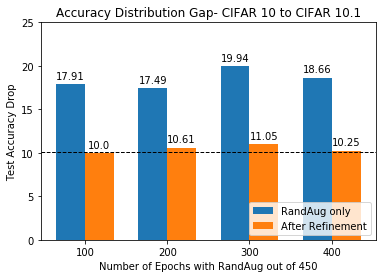

In [135]:
# sort by epoch for randaugment
df_dist_gap.sort_values(by='Epoch', inplace = True)

ep_ra = df_dist_gap[df_dist_gap['Model'] == "resnet_basic_32_ra_2_20"]['Epoch']
ac_ra = df_dist_gap[df_dist_gap['Model'] == "resnet_basic_32_ra_2_20"]['Accuracy'].round(decimals = 2)

# reverse the sort to have aligning 
df_dist_gap.sort_values(by='Epoch', ascending = False, inplace = True)
ep_re = 450 - df_dist_gap[df_dist_gap['Model'] != "resnet_basic_32_ra_2_20"]['Epoch']
ac_re = df_dist_gap[df_dist_gap['Model'] != "resnet_basic_32_ra_2_20"]['Accuracy'].round(decimals = 2)

x = np.arange(4)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, ac_ra, width, label = "RandAug only")
rects2 = ax.bar(x+width/2, ac_re, width, label = "After Refinement")

ax.set_ylabel("Test Accuracy Drop")
ax.set_ylim([0,25])
ax.set_title("Accuracy Distribution Gap- CIFAR 10 to CIFAR 10.1")
ax.set_xticks(x)
ax.set_xticklabels(['100', '200', '300', '400'])
ax.set_xlabel('Number of Epochs with RandAug out of 450')
ax.legend(loc = 'lower right')
ax.axhline(y=(92.32 - 82.2), linewidth = 1, linestyle = '--', color = 'k')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
